In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [4]:
df1 = pd.read_csv('modis_2021_India.csv')
df2 = pd.read_csv('modis_2022_India.csv')
df3 = pd.read_csv('modis_2023_India.csv')

In [14]:
df1.head() # print first 5 rows -
df1.tail()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
13504,23.2858,87.2753,336.9,1.5,1.2,2021-02-27,714.0,Aqua,MODIS,85.0,6.03,309.9,44.9,D,0.0
13505,23.2842,87.2015,327.0,1.5,1.2,2021-02-27,714.0,Aqua,MODIS,74.0,6.03,310.6,20.0,D,0.0
13506,23.2818,87.1871,325.8,1.5,1.2,2021-02-27,714.0,Aqua,MODIS,72.0,6.03,311.3,16.8,D,0.0
13507,23.3639,87.2525,329.2,1.5,1.2,2021-02-27,714.0,Aqua,MODIS,77.0,6.03,309.8,25.1,D,0.0
13508,25.0975,93.4265,338.6,1.1,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df2.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,30.1138,80.0756,300.0,1.2,1.1,2022-01-01,511.0,Terra,MODIS,7.0,6.03,288.4,7.1,D,0.0
1,23.7726,86.2078,306.1,1.6,1.2,2022-01-01,512.0,Terra,MODIS,62.0,6.03,293.5,10.4,D,2.0
2,22.2080,84.8627,304.8,1.4,1.2,2022-01-01,512.0,Terra,MODIS,42.0,6.03,293.3,5.8,D,2.0
3,23.7621,86.3946,306.9,1.6,1.2,2022-01-01,512.0,Terra,MODIS,38.0,6.03,295.2,9.3,D,2.0
4,23.6787,86.0891,303.6,1.5,1.2,2022-01-01,512.0,Terra,MODIS,52.0,6.03,293.1,7.2,D,2.0


In [16]:
df3.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,9.3280,77.6247,318.0,1.1,1.0,2023-01-01,821.0,Aqua,MODIS,62.0,61.03,305.0,7.6,D,0.0
1,10.4797,77.9378,313.8,1.0,1.0,2023-01-01,822.0,Aqua,MODIS,58.0,61.03,299.4,4.3,D,0.0
2,13.2478,77.2639,314.7,1.0,1.0,2023-01-01,822.0,Aqua,MODIS,55.0,61.03,302.4,4.9,D,0.0
3,12.2994,78.4085,314.3,1.0,1.0,2023-01-01,822.0,Aqua,MODIS,58.0,61.03,301.9,4.8,D,0.0
4,14.1723,75.5024,338.4,1.2,1.1,2023-01-01,823.0,Aqua,MODIS,88.0,61.03,305.3,41.5,D,0.0


In [17]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409.0,Terra,MODIS,44.0,6.03,292.6,8.6,D,0.0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547.0,Terra,MODIS,37.0,6.03,287.4,9.0,D,0.0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547.0,Terra,MODIS,8.0,6.03,286.5,5.4,D,0.0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547.0,Terra,MODIS,46.0,6.03,287.7,10.7,D,0.0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547.0,Terra,MODIS,43.0,6.03,287.6,9.0,D,0.0


In [18]:
df.shape # rows and cols

(40345, 15)

In [19]:
df.info() # dt, memc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40345 entries, 0 to 40344
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    40345 non-null  float64
 1   longitude   40345 non-null  float64
 2   brightness  40345 non-null  float64
 3   scan        40344 non-null  float64
 4   track       40344 non-null  float64
 5   acq_date    40344 non-null  object 
 6   acq_time    40342 non-null  float64
 7   satellite   40342 non-null  object 
 8   instrument  40342 non-null  object 
 9   confidence  40342 non-null  float64
 10  version     40342 non-null  float64
 11  bright_t31  40342 non-null  float64
 12  frp         40342 non-null  float64
 13  daynight    40342 non-null  object 
 14  type        40342 non-null  float64
dtypes: float64(11), object(4)
memory usage: 4.6+ MB


In [20]:
# Any missing values?
df.isnull().sum()

,0
latitude,0
longitude,0
brightness,0
scan,1
track,1
acq_date,1
acq_time,3
satellite,3
instrument,3
confidence,3


In [21]:
df.duplicated().sum()


np.int64(0)

In [22]:

# List out column names to check
df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [23]:
df.describe().T # statistics of dataset - numbers!

,count,mean,std,min,25%,50%,75%,max
latitude,40345.0,21.206146,4.760346,8.1903,17.652,21.5014,24.8747,34.4995
longitude,40345.0,82.107368,7.057361,68.5384,76.523,79.8257,86.3956,97.1044
brightness,40345.0,318.913739,12.681726,300.0000,311.100,317.8000,324.2000,502.1000
scan,40344.0,1.394153,0.620377,1.0000,1.000,1.1000,1.5000,4.8000
track,40344.0,1.142291,0.197801,1.0000,1.000,1.1000,1.2000,2.0000
acq_time,40342.0,805.981136,359.518210,321.0000,550.000,744.0000,819.0000,2139.0000
confidence,40342.0,61.882405,17.557234,0.0000,52.000,63.0000,73.0000,100.0000
version,40342.0,24.217001,25.875368,6.0300,6.030,6.0300,61.0300,61.0300
bright_t31,40342.0,300.610376,7.535019,267.4000,294.900,301.1000,306.3000,400.1000
frp,40342.0,22.832450,62.663379,0.0000,7.700,11.5000,19.7000,3216.2000


In [24]:
# Check Unique values of target variable
df.type.value_counts()

,count
type,
0.0,37192
2.0,3150


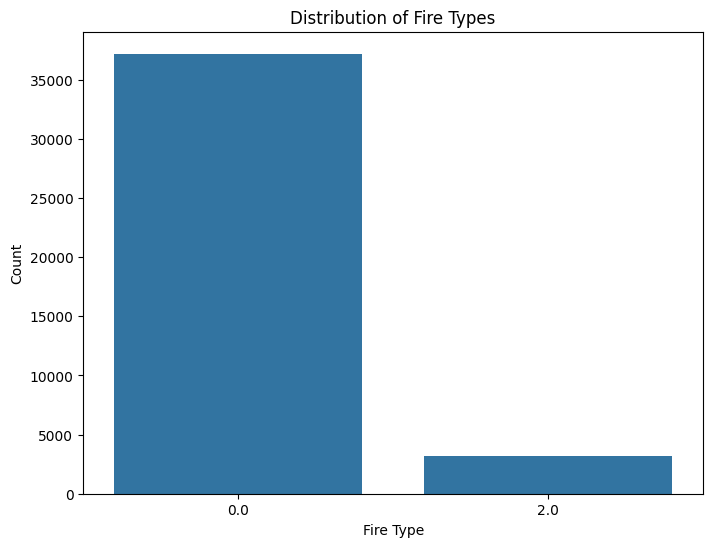

In [25]:
# Count plot for 'type'
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Fire Types')
plt.xlabel('Fire Type')
plt.ylabel('Count')
plt.show()

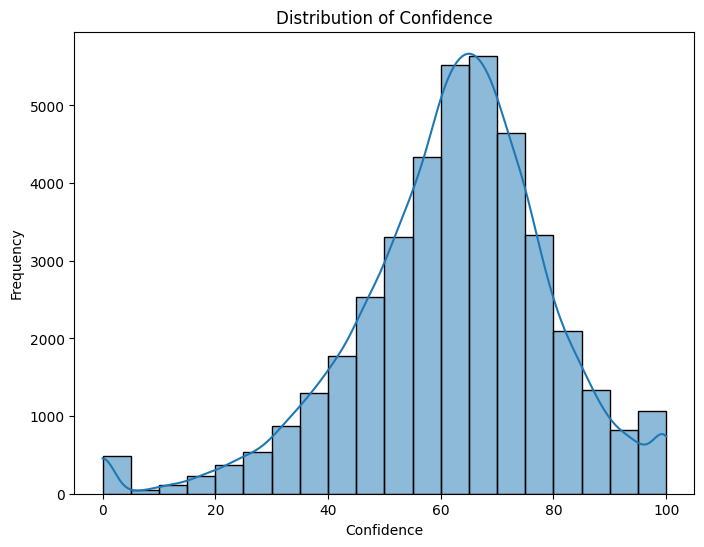

In [26]:
# Histogram of 'confidence'
plt.figure(figsize=(8, 6))
sns.histplot(df['confidence'], bins=20, kde=True)
plt.title('Distribution of Confidence')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()